In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [2]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import plot_partial_dependence

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import graphviz
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

In [5]:
import itertools

In [ ]:
# Your code here! :)

# read data and do initial exploration

In [6]:
df_credit = pd.read_csv('GermanCredit.csv')

In [7]:
df_credit.shape
df_credit.columns
df_credit.head()

(1000, 62)

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [8]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [9]:
df_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
InstallmentRatePercentage,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
ResidenceDuration,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
...,...,...,...,...,...,...,...,...
Housing.ForFree,1000.0,0.108,0.310536,0.0,0.0,0.0,0.00,1.0
Job.UnemployedUnskilled,1000.0,0.022,0.146757,0.0,0.0,0.0,0.00,1.0
Job.UnskilledResident,1000.0,0.200,0.400200,0.0,0.0,0.0,0.00,1.0
Job.SkilledEmployee,1000.0,0.630,0.483046,0.0,0.0,1.0,1.00,1.0


### divide features into various groups

In [10]:
features = list(df_credit.drop('Class', axis=1).columns)
features

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance',
 'Telephone',
 'ForeignWorker',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'EmploymentDur

In [11]:
features_not_one_hot = features[0:7]
features_not_one_hot

['Duration',
 'Amount',
 'InstallmentRatePercentage',
 'ResidenceDuration',
 'Age',
 'NumberExistingCredits',
 'NumberPeopleMaintenance']

In [12]:
features_one_hot = features[7:]
features_one_hot

['Telephone',
 'ForeignWorker',
 'CheckingAccountStatus.lt.0',
 'CheckingAccountStatus.0.to.200',
 'CheckingAccountStatus.gt.200',
 'CheckingAccountStatus.none',
 'CreditHistory.NoCredit.AllPaid',
 'CreditHistory.ThisBank.AllPaid',
 'CreditHistory.PaidDuly',
 'CreditHistory.Delay',
 'CreditHistory.Critical',
 'Purpose.NewCar',
 'Purpose.UsedCar',
 'Purpose.Furniture.Equipment',
 'Purpose.Radio.Television',
 'Purpose.DomesticAppliance',
 'Purpose.Repairs',
 'Purpose.Education',
 'Purpose.Vacation',
 'Purpose.Retraining',
 'Purpose.Business',
 'Purpose.Other',
 'SavingsAccountBonds.lt.100',
 'SavingsAccountBonds.100.to.500',
 'SavingsAccountBonds.500.to.1000',
 'SavingsAccountBonds.gt.1000',
 'SavingsAccountBonds.Unknown',
 'EmploymentDuration.lt.1',
 'EmploymentDuration.1.to.4',
 'EmploymentDuration.4.to.7',
 'EmploymentDuration.gt.7',
 'EmploymentDuration.Unemployed',
 'Personal.Male.Divorced.Seperated',
 'Personal.Female.NotSingle',
 'Personal.Male.Single',
 'Personal.Male.Married.Wid

In [13]:
encoded_groups = ['CheckingAccountStatus.', 'CreditHistory.', 'Purpose.', 'SavingsAccountBonds.', 'EmploymentDuration.',
                  'Personal.', 'OtherDebtorsGuarantors.', 'Property.', 'OtherInstallmentPlans.', 'Housing.', 'Job.']

In [14]:
target = ['Class']

# investigate feature values

### statics for numerical features

In [16]:
df_credit[features_not_one_hot].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
InstallmentRatePercentage,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
ResidenceDuration,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
NumberExistingCredits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
NumberPeopleMaintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [17]:
features_continuous = ['Duration', 'Amount', 'Age']
features_discrete   = ['InstallmentRatePercentage', 'ResidenceDuration', 'NumberExistingCredits', 'NumberPeopleMaintenance']

### continuous numerical features

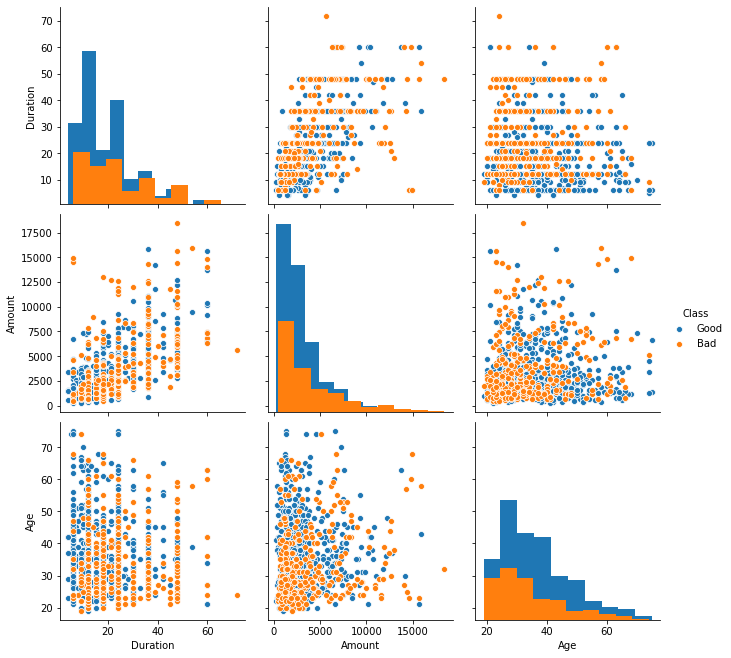

In [18]:
sns.pairplot(df_credit, vars=features_continuous, height=3, diag_kind='hist', hue=target[0]);
plt.show();

In [19]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_credit[features_continuous])
df_credit_scaled = pd.DataFrame(temp, columns=features_continuous)
df_credit_scaled[target[0]] = df_credit[target[0]]
df_credit_scaled.head()

,Duration,Amount,Age,Class
0,0.029412,0.050567,0.857143,Good
1,0.647059,0.313690,0.053571,Bad
2,0.117647,0.101574,0.535714,Good
3,0.558824,0.419941,0.464286,Good
4,0.294118,0.254209,0.607143,Bad


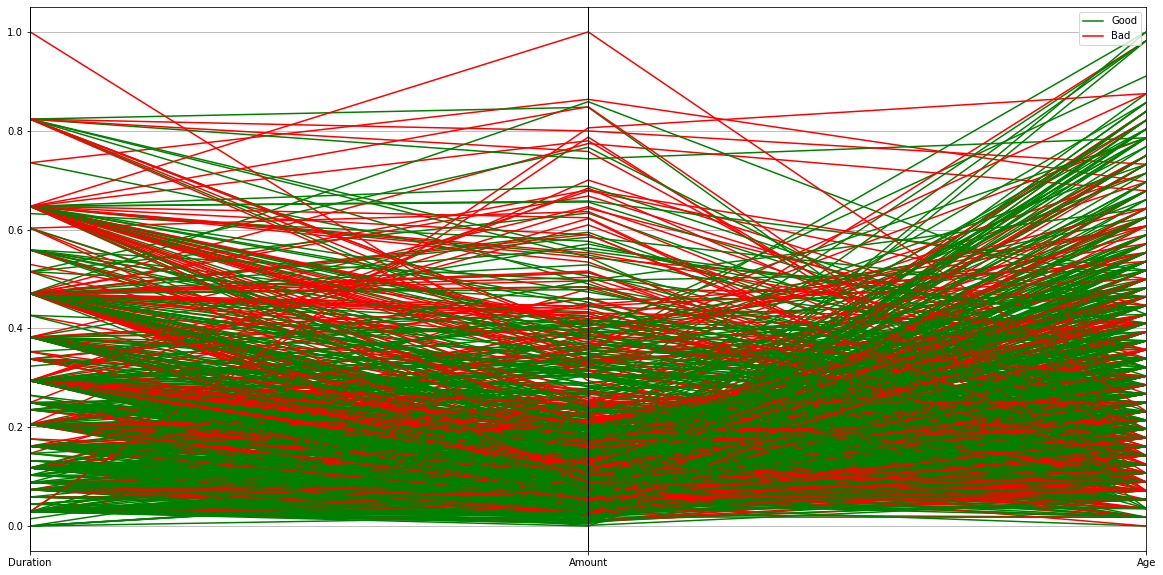

In [20]:
plt.figure(figsize=(20,10));
pd.plotting.parallel_coordinates(df_credit_scaled[features_continuous + target], target[0], color=['green', 'red']);

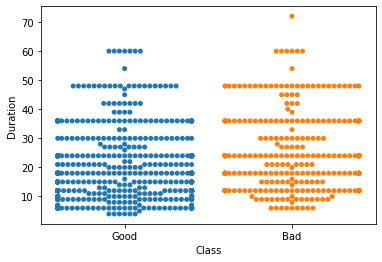

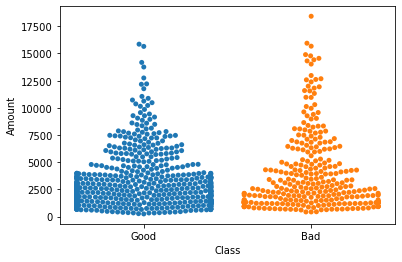

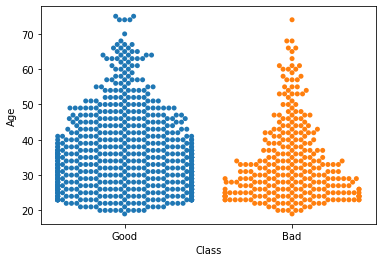

In [21]:
for feature in features_continuous:
    temp = plt.figure();
    temp = sns.swarmplot(target[0], feature, data=df_credit);

### discrete numerical features

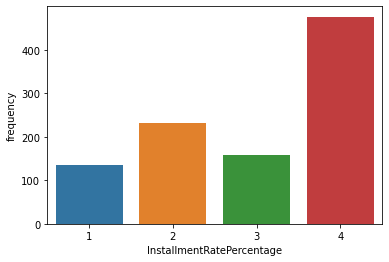

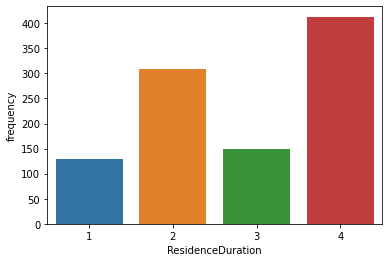

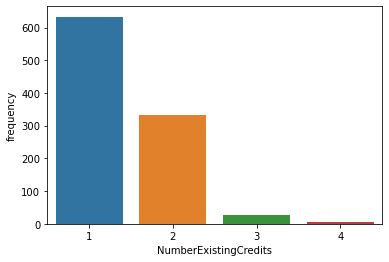

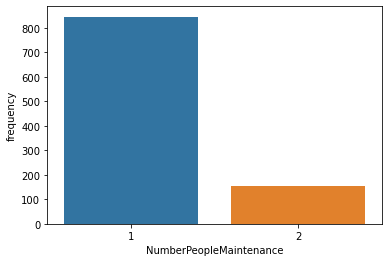

In [22]:
for feature in features_discrete:
    counts = df_credit[feature].value_counts()
    temp = plt.figure();
    bar = sns.barplot(counts.index, counts.values)
    temp = bar.set_xlabel(feature)
    temp = bar.set_ylabel('frequency')

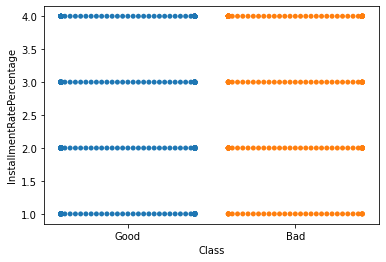

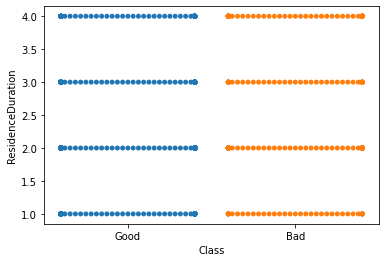

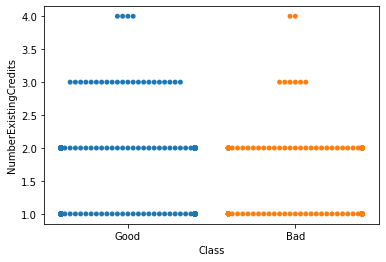

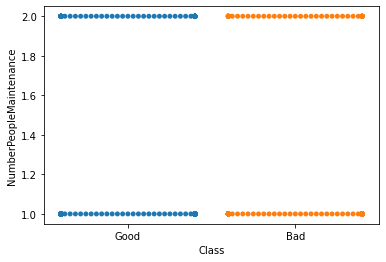

In [23]:
for feature in features_discrete:
    temp = plt.figure();
    temp = sns.swarmplot(target[0], feature, data=df_credit);

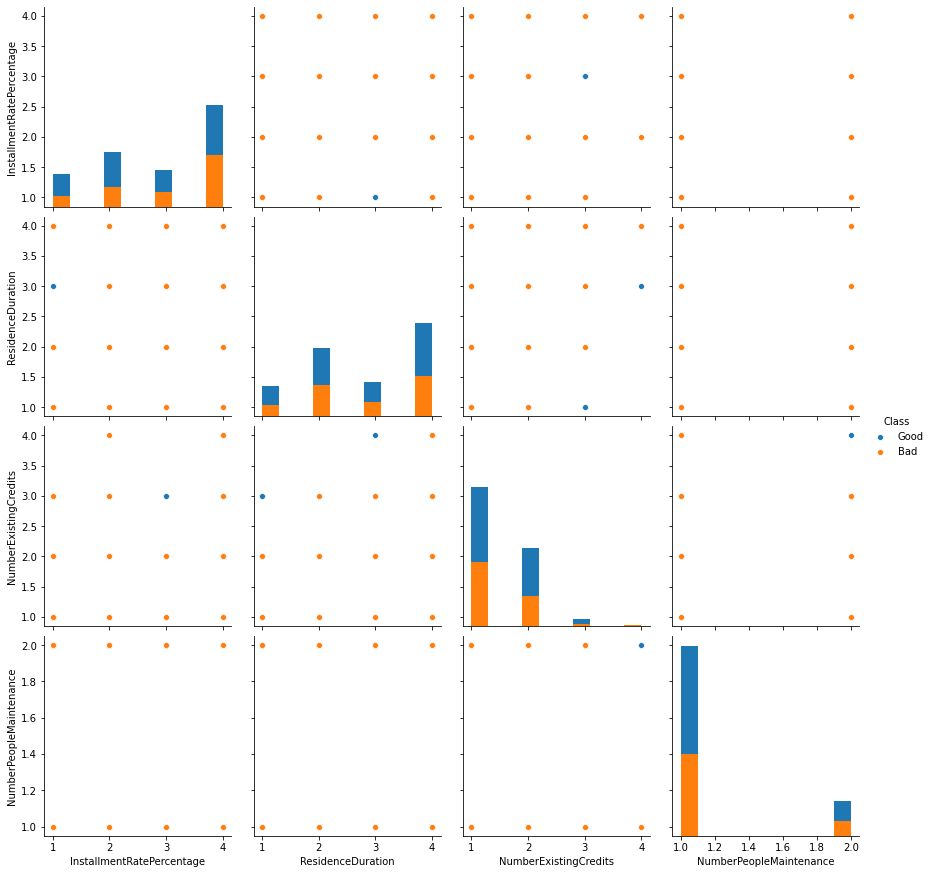

In [24]:
sns.pairplot(df_credit, vars=features_discrete, height=3, diag_kind='hist', hue=target[0]);
plt.show();

### encoded features

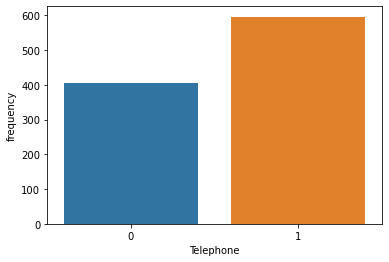

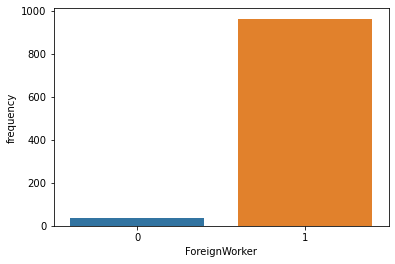

In [25]:
for feature in ['Telephone', 'ForeignWorker']:
    counts = df_credit[feature].value_counts()
    temp = plt.figure();
    bar = sns.barplot(counts.index, counts.values)
    temp = bar.set_xlabel(feature)
    temp = bar.set_ylabel('frequency')

### grouped and encoded features

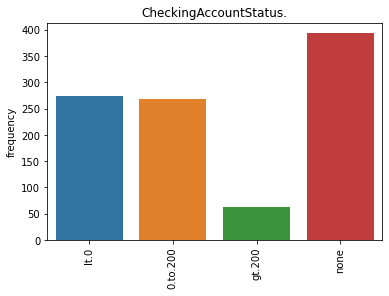

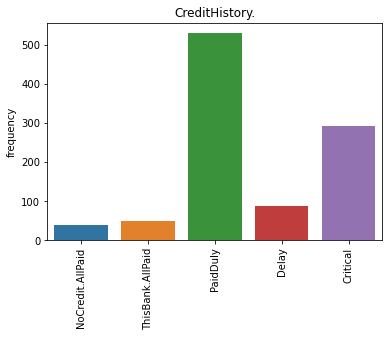

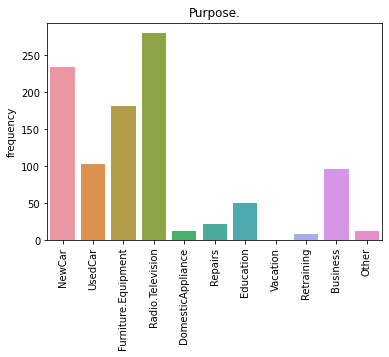

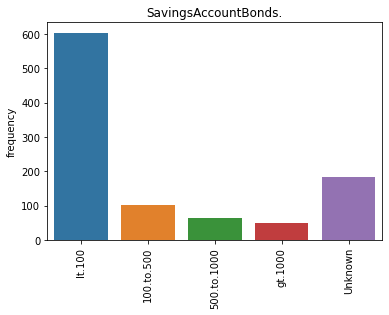

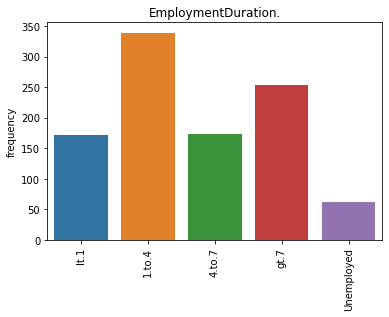

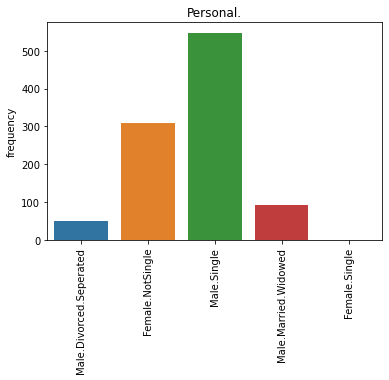

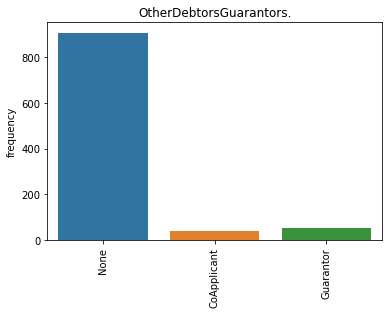

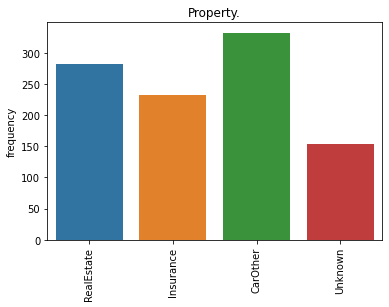

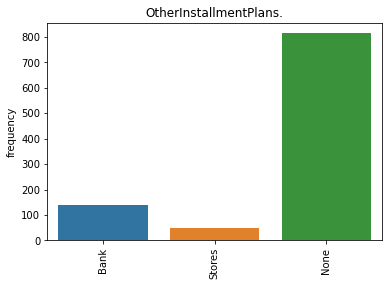

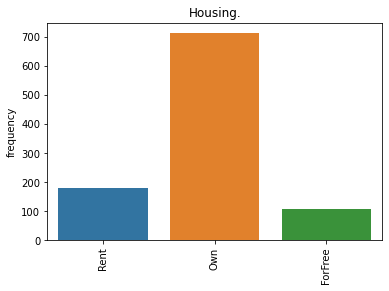

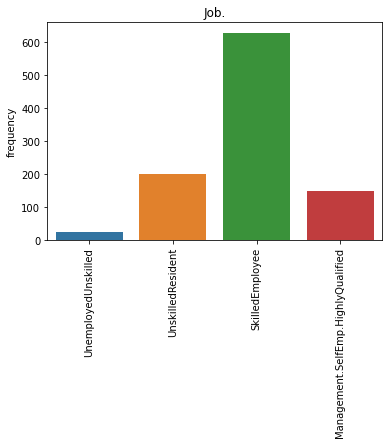

In [26]:
for group in encoded_groups:
#for group in ['Personal.']:
    encode_counts = {}

    for feature in features_one_hot:
        if feature.startswith(group):
            sum = df_credit[feature].sum()
            encode_counts[feature.replace(group,'')] = sum

    #encode_counts
    
    temp = plt.figure();
    bar = sns.barplot(list(encode_counts.keys()), list(encode_counts.values()));
    temp = bar.set_ylabel('frequency');
    temp = bar.set_title(group);
    temp = plt.xticks(rotation=90);
    temp = plt.show();

### investigate correlations between numerical features

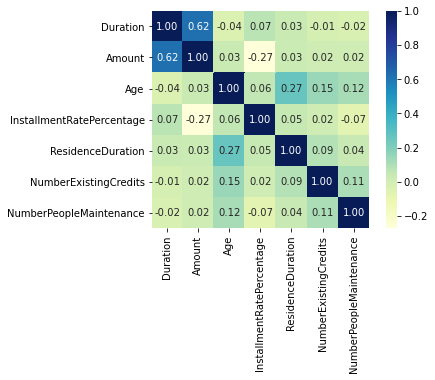

In [27]:
cor_matrix = df_credit[features_continuous + features_discrete].corr()
sns.heatmap(cor_matrix, square=True, annot=True, fmt='.2f', cmap='YlGnBu');

# train, test split

### split using orignal `string` target values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_credit[features], df_credit[target[0]],
                                                    train_size=0.7, random_state=59)

### split using target values converted to `0, 1`

In [29]:
target_array_binary = df_credit['Class'].apply(lambda x: 1 if x=='Good' else 0).values
target_array_binary[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [30]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df_credit[features], target_array_binary,
                                                            train_size=0.7, random_state=59)

# majority class

### entire data set

In [31]:
df_credit[target[0]].value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

### training set

In [32]:
dummy_majority = DummyClassifier(strategy = 'most_frequent')
dummy_majority.fit(X_train, y_train)
dummy_majority.score(X_train, y_train)

DummyClassifier(strategy='most_frequent')

0.6985714285714286

In [33]:
dummy_majority = DummyClassifier(strategy = 'most_frequent')
dummy_majority.fit(X_train_b, y_train_b)
dummy_majority.score(X_train_b, y_train_b)

DummyClassifier(strategy='most_frequent')

0.6985714285714286

# Decision Tree Classifier
### `max_depth: int, default=None`
### `min_samples_leaf: int, default=1`
### `max_features: int, {'sqrt', 'log2'}, default=None` default is use all features   
### `random_state: int`
### `max_leaf_nodes: int, default=None`

### build one tree and get familiar with results available

In [34]:
clf = DecisionTreeClassifier(max_depth=4, random_state=59)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=59)

0.7742857142857142

In [35]:
feature_imp = pd.DataFrame(clf.feature_importances_, index=features, columns=['importance']) \
                          .sort_values(by='importance', ascending=False)
feature_imp[feature_imp['importance']>0]

,importance
CheckingAccountStatus.none,0.395413
Duration,0.200193
Amount,0.117041
Age,0.067304
SavingsAccountBonds.gt.1000,0.040756
OtherInstallmentPlans.Bank,0.033375
OtherDebtorsGuarantors.CoApplicant,0.033314
Personal.Female.NotSingle,0.030936
SavingsAccountBonds.lt.100,0.030936
Job.Management.SelfEmp.HighlyQualified,0.026735


In [36]:
clf.classes_
clf.get_depth()
clf.get_n_leaves()

array(['Bad', 'Good'], dtype=object)

4

15

In [37]:
y_pred = clf.predict(X_train)
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.68      0.48      0.56       211
        Good       0.80      0.90      0.85       489

    accuracy                           0.77       700
   macro avg       0.74      0.69      0.71       700
weighted avg       0.76      0.77      0.76       700



# grid search
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [38]:
val_max_depth = [2,3,4,6,8,10]
val_max_features = [None, 'log2', 'sqrt']
metric = 'accuracy'

clf = DecisionTreeClassifier(random_state=59)
grid_clf_acc = GridSearchCV(clf, param_grid={'max_depth':val_max_depth, 'max_features':val_max_features},
                            cv=4, scoring=metric)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=59),
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': [None, 'log2', 'sqrt']},
             scoring='accuracy')

In [39]:
grid_clf_acc.classes_
grid_clf_acc.best_params_
grid_clf_acc.best_score_

array(['Bad', 'Good'], dtype=object)

{'max_depth': 4, 'max_features': 'sqrt'}

0.702857142857143

In [40]:
grid_clf_acc.cv_results_

{'mean_fit_time': array([0.00737053, 0.00610548, 0.00249332, 0.00418311, 0.00781101,
        0.00391287, 0.00390542, 0.00390548, 0.00390482, 0.00781131,
        0.00390816, 0.00781733, 0.00781059, 0.00162846, 0.00390559,
        0.00391269, 0.00782079, 0.00389898]),
 'std_fit_time': array([0.00556807, 0.007749  , 0.00259115, 0.00662012, 0.00781101,
        0.00677728, 0.00676438, 0.00676448, 0.00676335, 0.00781131,
        0.00676913, 0.00781733, 0.00781059, 0.00282057, 0.00676469,
        0.00677697, 0.00782079, 0.00675323]),
 'mean_score_time': array([0.00465363, 0.00274259, 0.00901574, 0.00390637, 0.0010094 ,
        0.0039072 , 0.00389773, 0.00162834, 0.0039084 , 0.00391173,
        0.00553423, 0.        , 0.00389868, 0.00390571, 0.00390452,
        0.00553566, 0.00389779, 0.00391251]),
 'std_score_time': array([0.00645013, 0.0029386 , 0.00603236, 0.00676603, 0.00174834,
        0.00676748, 0.00675106, 0.00282037, 0.00676954, 0.00677532,
        0.00639357, 0.        , 0.00675271, 

In [41]:
df_clf_acc_cv_results = pd.DataFrame(zip(grid_clf_acc.cv_results_['params'] , grid_clf_acc.cv_results_['mean_test_score']),
             columns=['params' , 'mean_score']).sort_values(by='mean_score', ascending=False)
df_clf_acc_cv_results

,params,mean_score
8,"{'max_depth': 4, 'max_features': 'sqrt'}",0.702857
1,"{'max_depth': 2, 'max_features': 'log2'}",0.700000
13,"{'max_depth': 8, 'max_features': 'log2'}",0.697143
4,"{'max_depth': 3, 'max_features': 'log2'}",0.695714
2,"{'max_depth': 2, 'max_features': 'sqrt'}",0.694286
14,"{'max_depth': 8, 'max_features': 'sqrt'}",0.685714
0,"{'max_depth': 2, 'max_features': None}",0.685714
17,"{'max_depth': 10, 'max_features': 'sqrt'}",0.685714
6,"{'max_depth': 4, 'max_features': None}",0.684286
11,"{'max_depth': 6, 'max_features': 'sqrt'}",0.684286


In [43]:
x_max_depth = []
x_max_features = []
for item in df_clf_acc_cv_results['params'].values:
    x_max_depth.append(item['max_depth'])
    x_max_features.append(item['max_features'])
#x_max_depth
#x_max_features

label_colors = {None:'red', 'log2':'yellow', 'sqrt':'blue'}
point_colors = list(map(lambda x: label_colors[x], x_max_features))
#point_colors

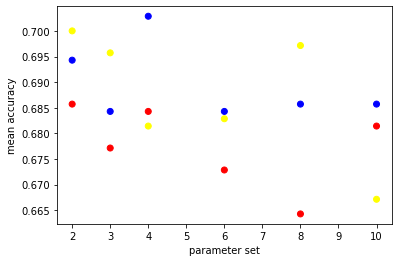

In [45]:
plt.scatter(x_max_depth, df_clf_acc_cv_results['mean_score'], c=point_colors);
plt.xlabel('parameter set');
plt.ylabel('mean accuracy');

### use binary target with `precision` for scoring metric

In [46]:
val_max_depth = [2,3,4,6,8,10]
val_max_features = [None, 'log2', 'sqrt']
metric = 'precision'

clf = DecisionTreeClassifier(random_state=59)
grid_clf_acc = GridSearchCV(clf, param_grid={'max_depth':val_max_depth, 'max_features':val_max_features},
                            cv=4, scoring=metric)
grid_clf_acc.fit(X_train_b, y_train_b)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=59),
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': [None, 'log2', 'sqrt']},
             scoring='precision')

In [47]:
grid_clf_acc.classes_
grid_clf_acc.best_params_
grid_clf_acc.best_score_

array([0, 1], dtype=int64)

{'max_depth': 6, 'max_features': None}

0.7833200611377269

In [48]:
y_pred_b = grid_clf_acc.predict(X_train_b)
accuracy_score(y_train_b, y_pred_b)
report = classification_report(y_train_b, y_pred_b)
print(report)

0.8385714285714285

              precision    recall  f1-score   support

           0       0.86      0.55      0.67       211
           1       0.83      0.96      0.89       489

    accuracy                           0.84       700
   macro avg       0.85      0.76      0.78       700
weighted avg       0.84      0.84      0.83       700



### try different metrics

In [49]:
val_max_depth = [2,3,4,6,8,10]
val_max_features = [None, 'log2', 'sqrt']
val_metric = ['accuracy', 'precision', 'recall', 'roc_auc']
df_cv_results = pd.DataFrame()

for metric in val_metric:
#for metric in ['accuracy']:
    clf = DecisionTreeClassifier(random_state=59)
    grid_clf = GridSearchCV(clf, param_grid={'max_depth':val_max_depth, 'max_features':val_max_features},
                            cv=4, scoring=metric)
    _ = grid_clf.fit(X_train_b, y_train_b)

    temp = {'metric':metric,
            'best_params':grid_clf.best_params_,
            'best_score':grid_clf.best_score_,
            'train_accuracy':accuracy_score(y_train_b, grid_clf.predict(X_train_b))}
    df_cv_results = df_cv_results.append(temp, ignore_index=True)

In [50]:
df_cv_results = df_cv_results.set_index('metric')
df_cv_results

,best_params,best_score,train_accuracy
metric,,,
accuracy,"{'max_depth': 4, 'max_features': 'sqrt'}",0.702857,0.725714
precision,"{'max_depth': 6, 'max_features': None}",0.783320,0.838571
recall,"{'max_depth': 2, 'max_features': 'sqrt'}",0.969346,0.712857
roc_auc,"{'max_depth': 3, 'max_features': 'log2'}",0.688153,0.722857


### best model
best accuracy on training set is `max_depth=6, max_features=None`

In [51]:
val_metric = ['accuracy', 'precision', 'recall', 'roc_auc']
metric_function = {'accuracy':accuracy_score,
                   'precision':precision_score,
                   'recall':recall_score,
                   'roc_auc':roc_auc_score}

In [52]:
clf_best = DecisionTreeClassifier(max_depth=6, max_features=None, random_state=59)
_ = clf_best.fit(X_train_b, y_train_b)
y_train_pred = clf_best.predict(X_train_b)
y_test_pred  = clf_best.predict(X_test_b)

df_best_model_results = pd.DataFrame()

for metric in val_metric:
    temp = {'metric':metric,
            'train':metric_function[metric](y_train_b, y_train_pred),
            'test':metric_function[metric](y_test_b,  y_test_pred)}
    df_best_model_results = df_best_model_results.append(temp, ignore_index=True)
    
df_best_model_results = df_best_model_results.set_index('metric')
df_best_model_results

,test,train
metric,,
accuracy,0.666667,0.838571
precision,0.730290,0.833333
recall,0.834123,0.961145
roc_auc,0.551893,0.757824


In [74]:
report = classification_report(y_train_b, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       211
           1       0.81      0.98      0.89       489

    accuracy                           0.82       700
   macro avg       0.85      0.72      0.75       700
weighted avg       0.84      0.82      0.81       700



In [53]:
feature_imp_clf_best = pd.DataFrame(clf_best.feature_importances_, index=features, columns=['importance']) \
                          .sort_values(by='importance', ascending=False)
feature_imp_clf_best[feature_imp_clf_best['importance']>0]

,importance
CheckingAccountStatus.none,0.227103
Amount,0.131841
Duration,0.114979
Age,0.084079
CheckingAccountStatus.lt.0,0.048251
EmploymentDuration.Unemployed,0.045649
EmploymentDuration.lt.1,0.041313
Personal.Male.Single,0.041050
OtherDebtorsGuarantors.CoApplicant,0.027749
SavingsAccountBonds.100.to.500,0.026951


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
#! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [ ]:
# Your code here! :)

### visualize tree

In [54]:
sk_dtree = ShadowSKDTree(clf_best, X_train_b, y_train_b, features, target[0], [0, 1])

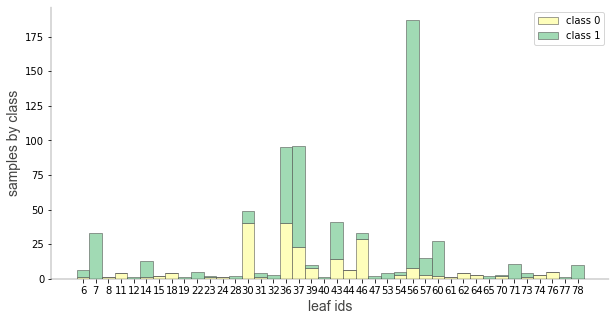

In [55]:
trees.ctreeviz_leaf_samples(sk_dtree)

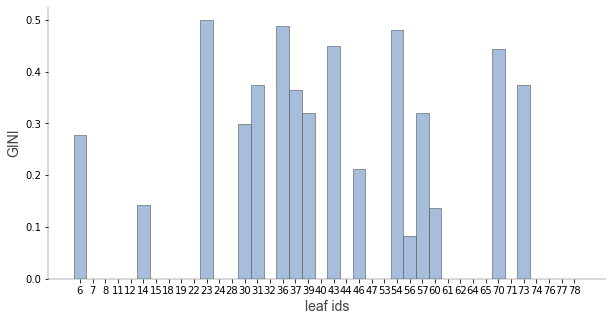

In [56]:
trees.viz_leaf_criterion(sk_dtree)

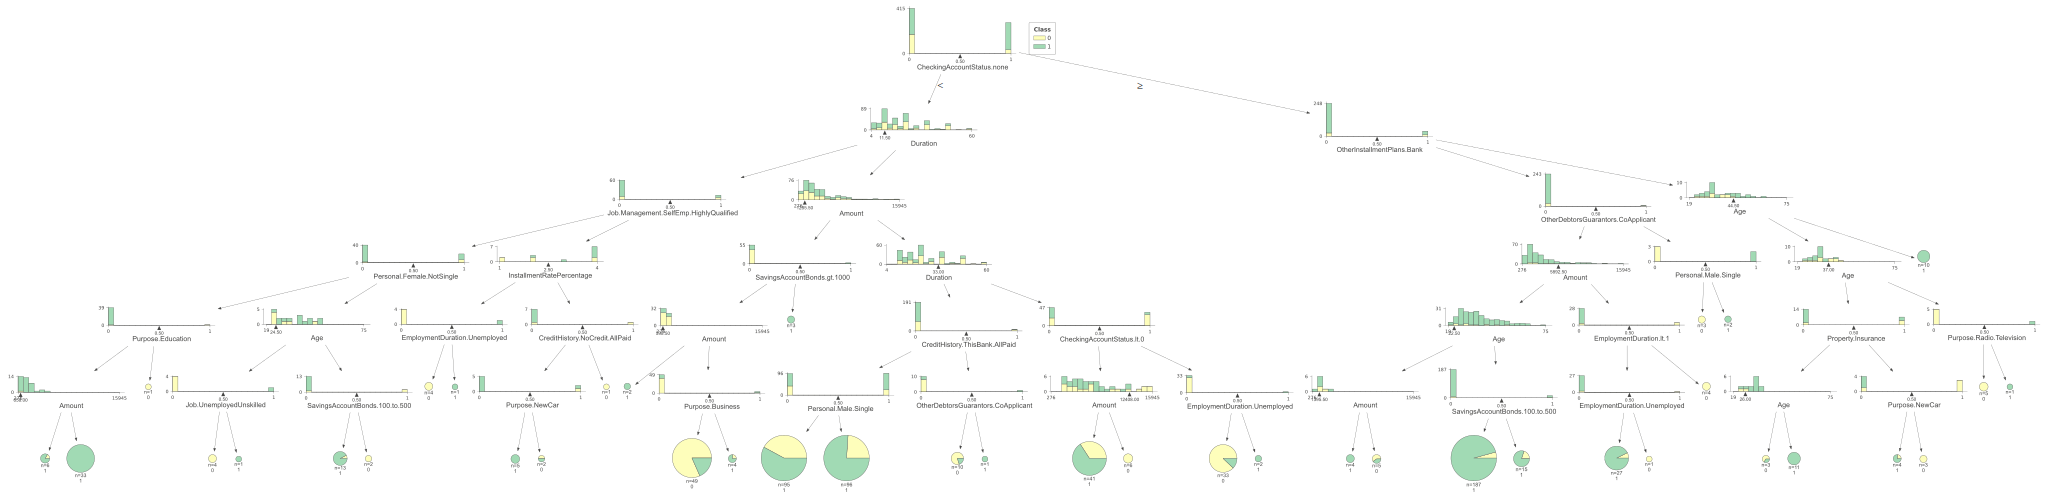

In [57]:
trees.dtreeviz(sk_dtree)

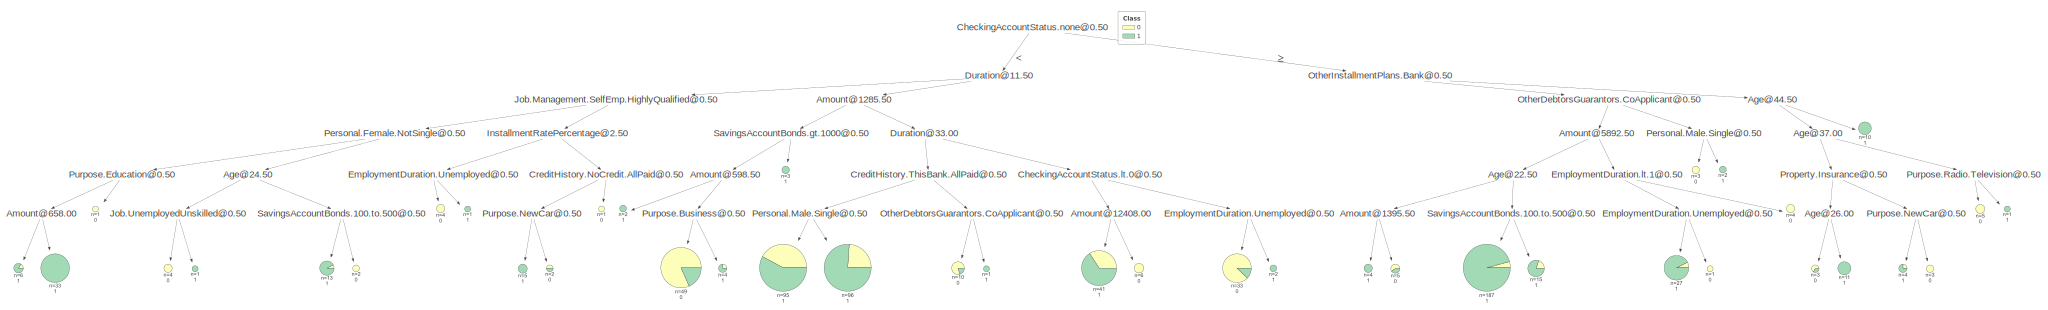

In [58]:
trees.dtreeviz(sk_dtree, fancy=False)

In [60]:
trees.describe_node_sample(sk_dtree, node_id=36).transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,95.0,19.705263,5.856209,12.0,15.0,18.0,24.0,30.0
Amount,95.0,3193.242105,1919.051964,1295.0,1911.0,2631.0,3753.5,12976.0
InstallmentRatePercentage,95.0,2.736842,1.103288,1.0,2.0,3.0,4.0,4.0
ResidenceDuration,95.0,2.757895,1.260832,1.0,2.0,3.0,4.0,4.0
Age,95.0,31.221053,10.059587,20.0,24.0,28.0,35.0,67.0
...,...,...,...,...,...,...,...,...
Housing.ForFree,95.0,0.063158,0.244537,0.0,0.0,0.0,0.0,1.0
Job.UnemployedUnskilled,95.0,0.031579,0.175804,0.0,0.0,0.0,0.0,1.0
Job.UnskilledResident,95.0,0.147368,0.356353,0.0,0.0,0.0,0.0,1.0
Job.SkilledEmployee,95.0,0.652632,0.478660,0.0,0.0,1.0,1.0,1.0


### visualize a prediction

In [61]:
print(trees.explain_prediction_path(clf_best, X_train_b.iloc[59], feature_names=features, explanation_type="plain_english"))

Duration < 11.5
24.5 <= Age 
CheckingAccountStatus.none < 0.5
SavingsAccountBonds.100.to.500 < 0.5
0.5 <= Personal.Female.NotSingle 
Job.Management.SelfEmp.HighlyQualified < 0.5



<AxesSubplot:xlabel='features', ylabel='feature importance'>

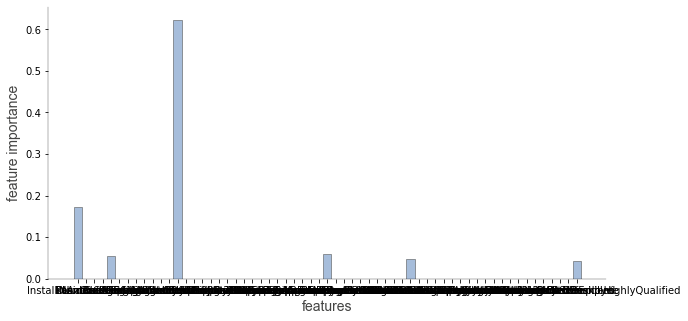

In [62]:
trees.explain_prediction_path(clf_best, X_train_b.iloc[59], feature_names=features, explanation_type="sklearn_default")

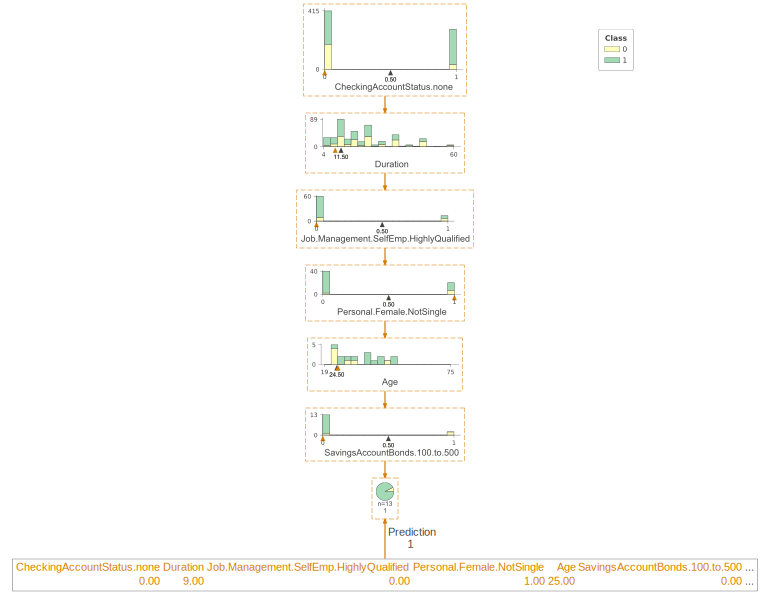

In [63]:
trees.dtreeviz(sk_dtree, show_just_path=True, X=X_train_b.iloc[59])

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [ ]:
# Your code here! :)

# Random Forest Classifier
### `n_estimators: int, default=100`
### `criterion: 'gini', 'entropy'`
### `max_depth: int, default=None`
### `min_samples_leaf: int, default=1`
### `max_features: int, {'sqrt', 'log2'}, default=None` default is use all features   
### `random_state: int`
### `max_leaf_nodes: int, default=None`

### build one tree and get familiar with results available

In [64]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=59)
rf_clf.fit(X_train_b, y_train_b)

RandomForestClassifier(max_depth=4, random_state=59)

In [65]:
y_pred = rf_clf.predict(X_train_b)
report = classification_report(y_train_b, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.15      0.26       211
           1       0.73      1.00      0.84       489

    accuracy                           0.74       700
   macro avg       0.85      0.57      0.55       700
weighted avg       0.80      0.74      0.67       700



In [66]:
feature_imp = pd.DataFrame(rf_clf.feature_importances_, index=features, columns=['importance']) \
                          .sort_values(by='importance', ascending=False)
feature_imp[feature_imp['importance']>0.02]

,importance
CheckingAccountStatus.none,0.110023
CheckingAccountStatus.lt.0,0.107761
Amount,0.085847
Duration,0.084343
Age,0.051923
SavingsAccountBonds.lt.100,0.048940
CreditHistory.Critical,0.043948
CreditHistory.ThisBank.AllPaid,0.036200
Purpose.NewCar,0.033379
SavingsAccountBonds.Unknown,0.021745


### grid search with `accuracy`

In [67]:
val_n_est = [100, 200, 300]
val_criterion = ['gini', 'entropy']
val_max_depth = [2, 3, 4]
val_max_features = [None, 'log2', 'sqrt']
val_metric = ['accuracy', 'precision', 'recall', 'roc_auc']
the_grid = {'n_estimators':val_n_est,
            'criterion':val_criterion,
            'max_depth':val_max_depth,
            'max_features':val_max_features}

df_cv_results = pd.DataFrame()

#for metric in val_metric:
for metric in ['accuracy']:
    rf_clf = RandomForestClassifier(random_state=59)
    grid_clf = GridSearchCV(rf_clf, param_grid=the_grid, cv=4, scoring=metric)
    _ = grid_clf.fit(X_train_b, y_train_b)

    temp = {'metric':metric,
            'best_params':grid_clf.best_params_,
            'best_score':grid_clf.best_score_,
            'train_accuracy':accuracy_score(y_train_b, grid_clf.predict(X_train_b))}
    df_cv_results = df_cv_results.append(temp, ignore_index=True)

In [68]:
df_rf_clf_cv_acc_results = pd.DataFrame(zip(grid_clf.cv_results_['params'] , grid_clf.cv_results_['mean_test_score']),
             columns=['params' , 'mean_score']).sort_values(by='mean_score', ascending=False)
df_rf_clf_cv_acc_results

,params,mean_score
45,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.765714
47,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.754286
19,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.752857
46,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.752857
20,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.747143
18,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.744286
9,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.731429
37,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.730000
10,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.730000
11,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.728571


### grid search with different metrics

In [69]:
val_n_est = [100, 200, 300]
val_criterion = ['gini', 'entropy']
val_max_depth = [2, 3, 4]
val_max_features = [None, 'log2', 'sqrt']
val_metric = ['accuracy', 'precision', 'recall', 'roc_auc']
the_grid = {'n_estimators':val_n_est,
            'criterion':val_criterion,
            'max_depth':val_max_depth,
            'max_features':val_max_features}

df_rf_clf_cv_results = pd.DataFrame()

for metric in val_metric:
    rf_clf = RandomForestClassifier(random_state=59)
    grid_clf = GridSearchCV(rf_clf, param_grid=the_grid, cv=4, scoring=metric)
    _ = grid_clf.fit(X_train_b, y_train_b)

    temp = {'metric':metric,
            'best_params':grid_clf.best_params_,
            'best_score':grid_clf.best_score_,
            'train_accuracy':accuracy_score(y_train_b, grid_clf.predict(X_train_b))}
    df_rf_clf_cv_results = df_rf_clf_cv_results.append(temp, ignore_index=True)

In [70]:
df_rf_clf_cv_results

,best_params,best_score,metric,train_accuracy
0,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.765714,accuracy,0.824286
1,"{'criterion': 'entropy', 'max_depth': 4, 'max_...",0.777298,precision,0.824286
2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",1.000000,recall,0.698571
3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.779560,roc_auc,0.745714


In [71]:
print(df_rf_clf_cv_results['best_params'][0])
print(df_rf_clf_cv_results['best_params'][1])

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'n_estimators': 100}


### best model

In [72]:
val_metric = ['accuracy', 'precision', 'recall', 'roc_auc']
metric_function = {'accuracy':accuracy_score,
                   'precision':precision_score,
                   'recall':recall_score,
                   'roc_auc':roc_auc_score}

In [73]:
the_best_params = df_rf_clf_cv_results['best_params'][0]
rf_clf_best = RandomForestClassifier(n_estimators=the_best_params['n_estimators'], 
                                     criterion=the_best_params['criterion'],
                                     max_depth=the_best_params['max_depth'],
                                     max_features=the_best_params['max_features'],
                                     random_state=59)

_ = rf_clf_best.fit(X_train_b, y_train_b)
y_train_pred = rf_clf_best.predict(X_train_b)
y_test_pred  = rf_clf_best.predict(X_test_b)

df_rf_best_model_results = pd.DataFrame()

for metric in val_metric:
    temp = {'metric':metric,
            'train':metric_function[metric](y_train_b, y_train_pred),
            'test':metric_function[metric](y_test_b,  y_test_pred)}
    df_rf_best_model_results = df_rf_best_model_results.append(temp, ignore_index=True)
    
df_rf_best_model_results = df_rf_best_model_results.set_index('metric')
df_rf_best_model_results

,test,train
metric,,
accuracy,0.723333,0.824286
precision,0.744275,0.811224
recall,0.924171,0.975460
roc_auc,0.585681,0.724697


In [75]:
report = classification_report(y_train_b, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       211
           1       0.81      0.98      0.89       489

    accuracy                           0.82       700
   macro avg       0.85      0.72      0.75       700
weighted avg       0.84      0.82      0.81       700



### best model: make DataFrame with feature importance information

In [76]:
temp_std = np.std([tree.feature_importances_ for tree in rf_clf_best.estimators_],
             axis=0)

feature_imp_rf_best = pd.DataFrame(zip(rf_clf_best.feature_importances_, temp_std),
                                   index=features, columns=['importance','std']) \
                                 .sort_values(by='importance', ascending=False)
feature_imp_rf_best.head(10)

,importance,std
CheckingAccountStatus.none,0.291861,0.064478
Duration,0.132782,0.067295
Amount,0.109124,0.065112
Age,0.086064,0.054677
SavingsAccountBonds.lt.100,0.029927,0.040361
OtherInstallmentPlans.Bank,0.025984,0.034072
CreditHistory.Critical,0.016766,0.032812
Purpose.NewCar,0.016727,0.031513
Property.Unknown,0.015009,0.032297
InstallmentRatePercentage,0.014505,0.026467


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [ ]:
# Your code here

In [77]:
feature_imp_rf_best.head()

,importance,std
CheckingAccountStatus.none,0.291861,0.064478
Duration,0.132782,0.067295
Amount,0.109124,0.065112
Age,0.086064,0.054677
SavingsAccountBonds.lt.100,0.029927,0.040361


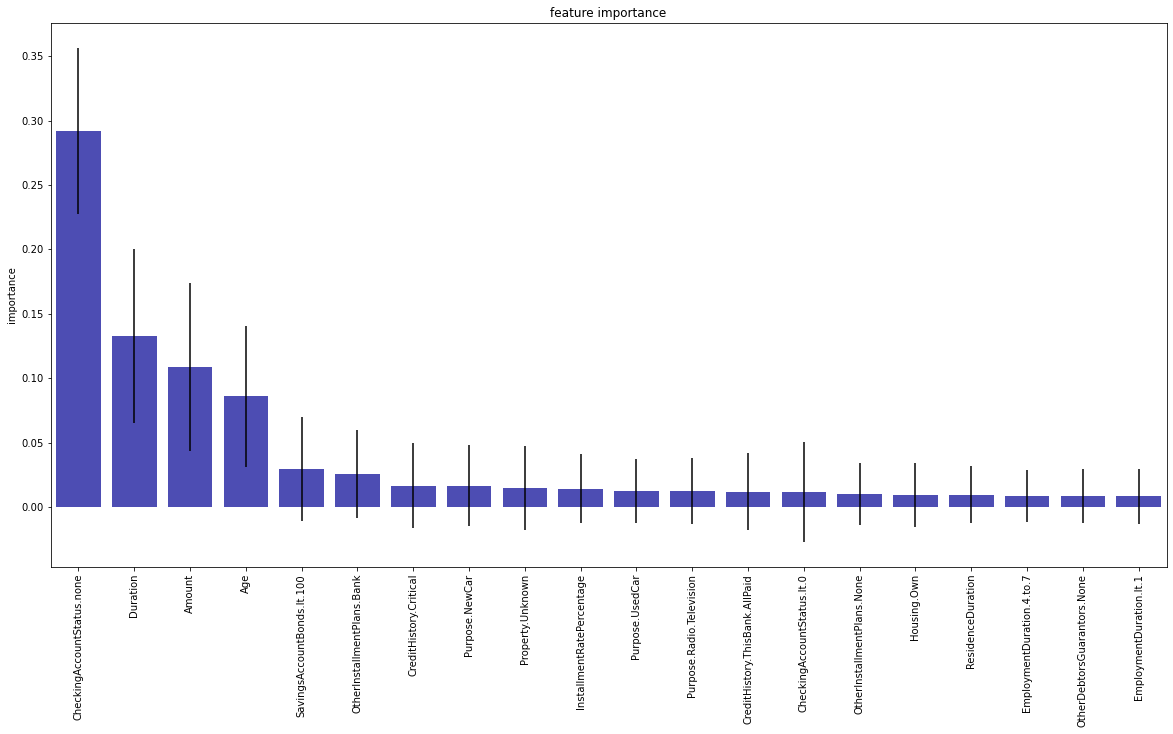

In [78]:
num_features = 20
plt.figure(figsize=(20,10));
bar = sns.barplot(feature_imp_rf_best.index[:num_features], feature_imp_rf_best['importance'][:num_features], 
                  yerr=feature_imp_rf_best['std'][:num_features], color='blue', saturation=0.4);
temp = bar.set_title('feature importance');
temp = plt.xticks(rotation=90);

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [ ]:
# Your code here!

sklearn pdp does support random forest now   
https://scikit-learn.org/stable/modules/partial_dependence.html

<Figure size 2880x5760 with 0 Axes>

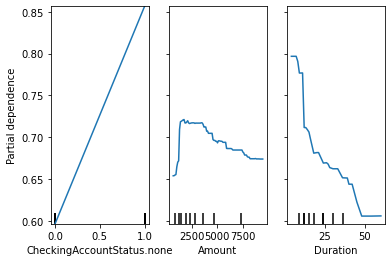

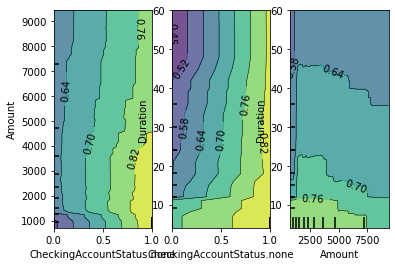

In [79]:
plt.figure(figsize=(40,80));

pdp_features = ['CheckingAccountStatus.none', 'Amount', 'Duration']
pdp_features_indices = list(map(lambda x: list(X_train_b.columns).index(x), pdp_features))
#pdp_features_indices
pdp_2_way = list(itertools.combinations(pdp_features, 2))
#pdp_2_way = []

plot_partial_dependence(rf_clf_best, X_train_b, pdp_features);
plt.show();

plot_partial_dependence(rf_clf_best, X_train_b, pdp_2_way);
plt.show();